In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
isic_metadata = pd.read_csv("data/isic/metadata.csv", low_memory=False)
columns_to_drop = ['attribution', "copyright_license", "acquisition_day"]
isic_metadata = isic_metadata.drop(columns=columns_to_drop)
isic_metadata.head(10)

,isic_id,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,diagnosis_1,diagnosis_2,diagnosis_3,...,mel_thick_mm,mel_ulcer,melanocytic,patient_id,personal_hx_mm,pixels_x,pixels_y,rcm_case_id,sex,tbp_tile_type
0,ISIC_0000000,55.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
1,ISIC_0000001,30.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
2,ISIC_0000002,60.0,upper extremity,NaN,NaN,True,NaN,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
3,ISIC_0000003,30.0,upper extremity,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,male,NaN
4,ISIC_0000004,80.0,posterior torso,NaN,NaN,True,NaN,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",...,NaN,NaN,True,NaN,NaN,1022,767,NaN,male,NaN
5,ISIC_0000005,40.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
6,ISIC_0000006,25.0,posterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
7,ISIC_0000007,25.0,posterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
8,ISIC_0000008,30.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
9,ISIC_0000009,30.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN


In [7]:
clinical_cols = [
    "age_approx",
    "anatom_site_general",
    "anatom_site_special",
    "clin_size_long_diam_mm",
    "concomitant_biopsy",
    "dermoscopic_type",
    "diagnosis_1",
    "diagnosis_2",
    "diagnosis_3",
    "diagnosis_4",
    "diagnosis_5",
    "diagnosis_confirm_type",
    "family_hx_mm",
    "fitzpatrick_skin_type"
    "sex"
]

# Intersect with available columns (in case some are missing)
clinical_cols = [c for c in clinical_cols if c in isic_metadata.columns]

isic_clinical = isic_metadata[clinical_cols].copy()
isic_clinical.insert(0, "isic_id", isic_metadata["isic_id"])
isic_other = isic_metadata.drop(columns=clinical_cols).copy()

isic_clinical.to_csv("isic_metadata_clinicalinfo.csv", index=False)
isic_other.to_csv("isic_metadata_nonclinical.csv", index=False)

print("Clinical dataset shape:", isic_clinical.shape)
print("Non-clinical dataset shape:", isic_other.shape)

Clinical dataset shape: (549575, 14)
Non-clinical dataset shape: (549575, 16)


In [10]:
diagnosis_cols = ['diagnosis_1', 'diagnosis_2', 'diagnosis_3', 'diagnosis_4', 'diagnosis_5']
isic_diagnosis = isic_clinical[diagnosis_cols]
null_counts = isic_diagnosis.isnull().sum()
non_null_counts = isic_diagnosis.notnull().sum()
null_pct = (isic_diagnosis.isnull().mean() * 100).round(2)

dtypes = isic_diagnosis.dtypes.astype(str)

stats_isic = (
    pd.DataFrame({
        'null_count': null_counts,
        'non_null_count': non_null_counts,
        'null_pct': null_pct,
        'dtype': dtypes,
    })
    .sort_values('null_pct', ascending=True)
    .reset_index()
    .rename(columns={'index': 'column'})
)

stats_isic


,column,null_count,non_null_count,null_pct,dtype
0,diagnosis_1,19527,530048,3.55,object
1,diagnosis_2,456930,92645,83.14,object
2,diagnosis_3,460091,89484,83.72,object
3,diagnosis_4,532896,16679,96.97,object
4,diagnosis_5,541797,7778,98.58,object


In [49]:
isic_diagnosis_3 = isic_metadata[isic_metadata['diagnosis_3'].notnull()]
print("Number of images with not null diagnosis_3: ", len(isic_diagnosis_3))
isic_diagnosis_3.head(10)

Number of images with not null diagnosis_3:  89484


,isic_id,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,diagnosis_1,diagnosis_2,diagnosis_3,...,mel_thick_mm,mel_ulcer,melanocytic,patient_id,personal_hx_mm,pixels_x,pixels_y,rcm_case_id,sex,tbp_tile_type
0,ISIC_0000000,55.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
1,ISIC_0000001,30.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
2,ISIC_0000002,60.0,upper extremity,NaN,NaN,True,NaN,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
3,ISIC_0000003,30.0,upper extremity,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,male,NaN
4,ISIC_0000004,80.0,posterior torso,NaN,NaN,True,NaN,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",...,NaN,NaN,True,NaN,NaN,1022,767,NaN,male,NaN
5,ISIC_0000005,40.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
6,ISIC_0000006,25.0,posterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
7,ISIC_0000007,25.0,posterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
8,ISIC_0000008,30.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN
9,ISIC_0000009,30.0,anterior torso,NaN,NaN,False,NaN,Benign,Benign melanocytic proliferations,Nevus,...,NaN,NaN,True,NaN,NaN,1022,767,NaN,female,NaN


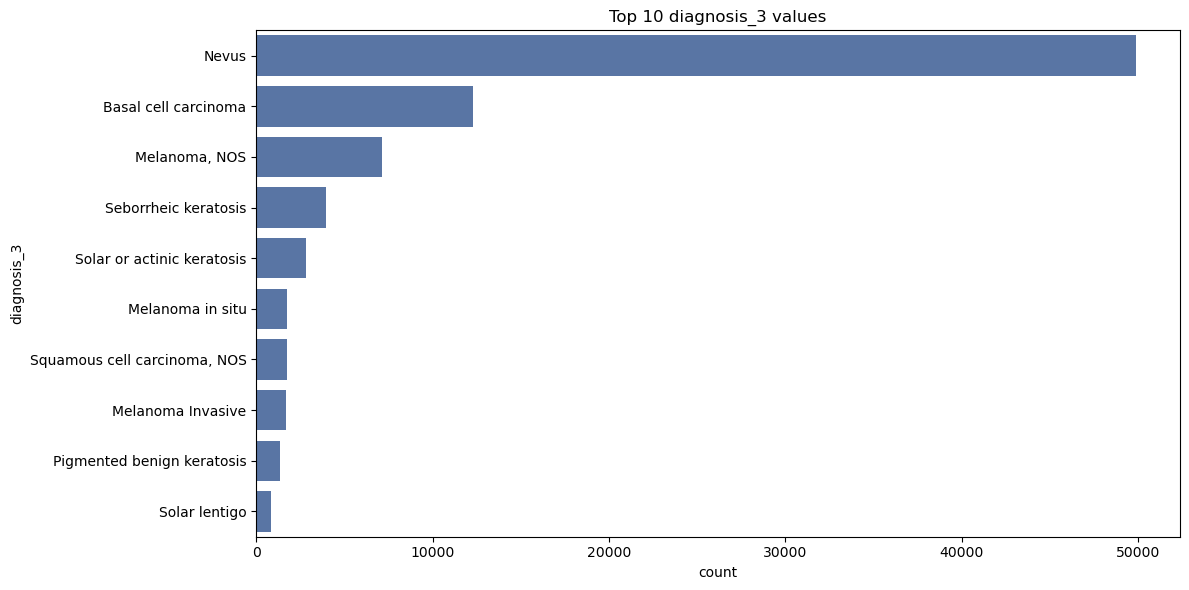

In [22]:
# Top 10 distribution for diagnosis_3
TOP_N = 10
isic_diagnosis_3 = isic_metadata[isic_metadata['diagnosis_3'].notnull()]
counts = isic_diagnosis_3['diagnosis_3'].value_counts().head(TOP_N)

plt.figure(figsize=(12, max(6, TOP_N * 0.45)))
sns.barplot(x=counts.values, y=counts.index.astype(str), orient='h', color='#4C72B0')
plt.title(f'Top {TOP_N} diagnosis_3 values')
plt.xlabel('count')
plt.ylabel('diagnosis_3')
plt.tight_layout()
plt.show()


In [35]:
isic_diagnosis_3['image_type'].value_counts()

image_type
dermoscopic           80407
clinical: close-up     7541
TBP tile: close-up     1065
clinical: overview      422
RCM: mosaic              25
RCM: tile                18
RCM: macroscopic          5
Name: count, dtype: int64

Combined subset rows: 9,028
image_type
clinical: close-up    7541
TBP tile: close-up    1065
clinical: overview     422
Name: count, dtype: int64


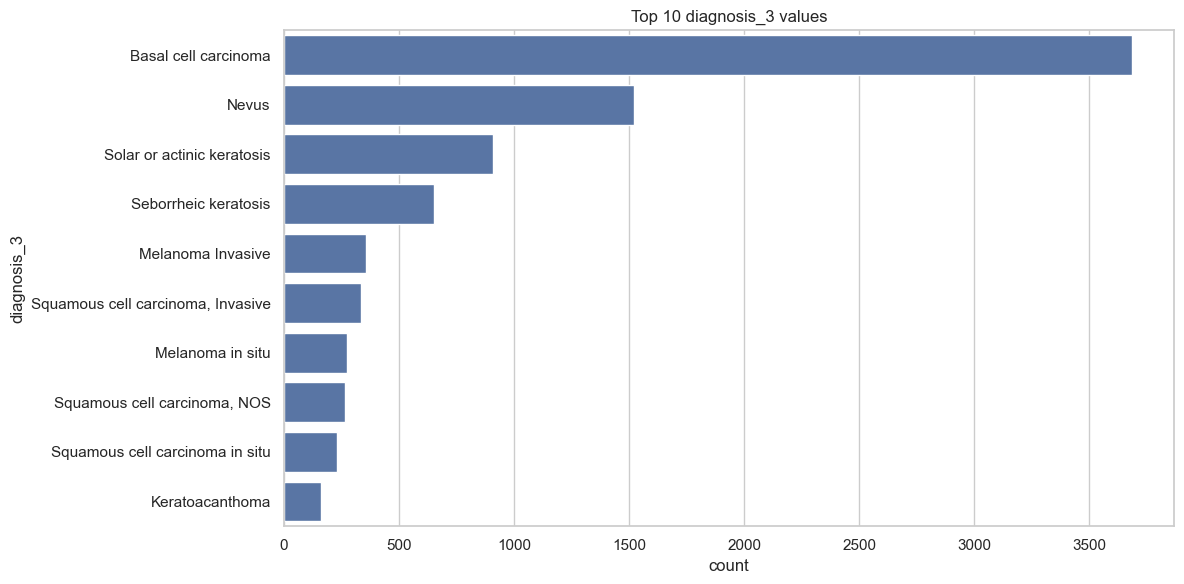

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

image_type_series = isic_diagnosis_3['image_type'].astype(str).str.strip()

valid_types = [
    "clinical: close-up",
    "TBP tile: close-up",
    "clinical: overview",
]
isic_diagnosis_3_filtered = isic_diagnosis_3.loc[image_type_series.isin(valid_types)].copy()
print(f"Combined subset rows: {len(isic_diagnosis_3_filtered):,}")
print(isic_diagnosis_3_filtered['image_type'].value_counts())

TOP_N = 10
counts = isic_diagnosis_3_filtered['diagnosis_3'].value_counts().head(TOP_N)

plt.figure(figsize=(12, max(6, TOP_N * 0.45)))
sns.barplot(x=counts.values, y=counts.index.astype(str), orient='h', color='#4C72B0')
plt.title(f'Top {TOP_N} diagnosis_3 values')
plt.xlabel('count')
plt.ylabel('diagnosis_3')
plt.tight_layout()
plt.show()

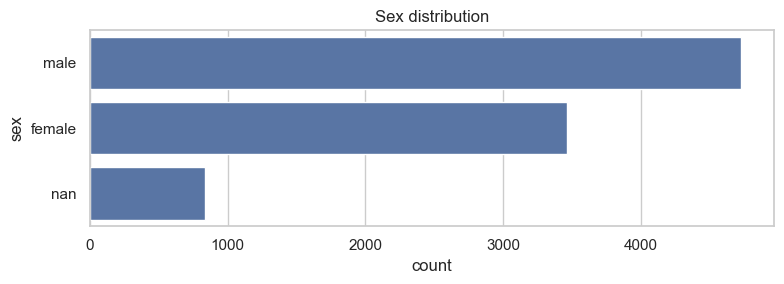

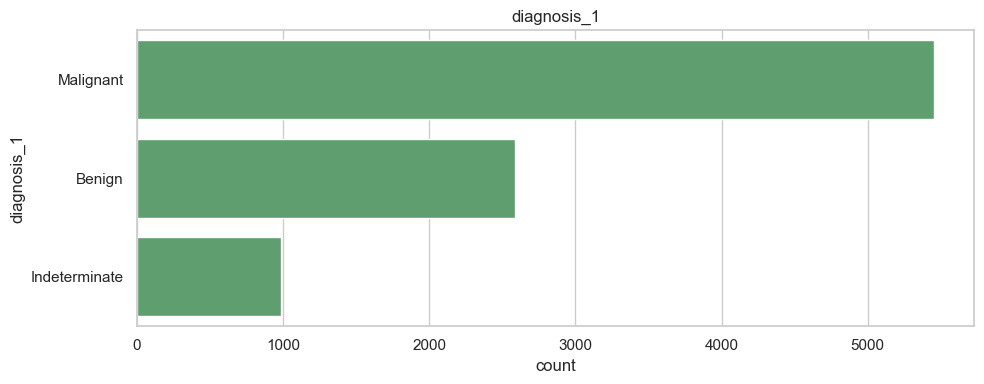

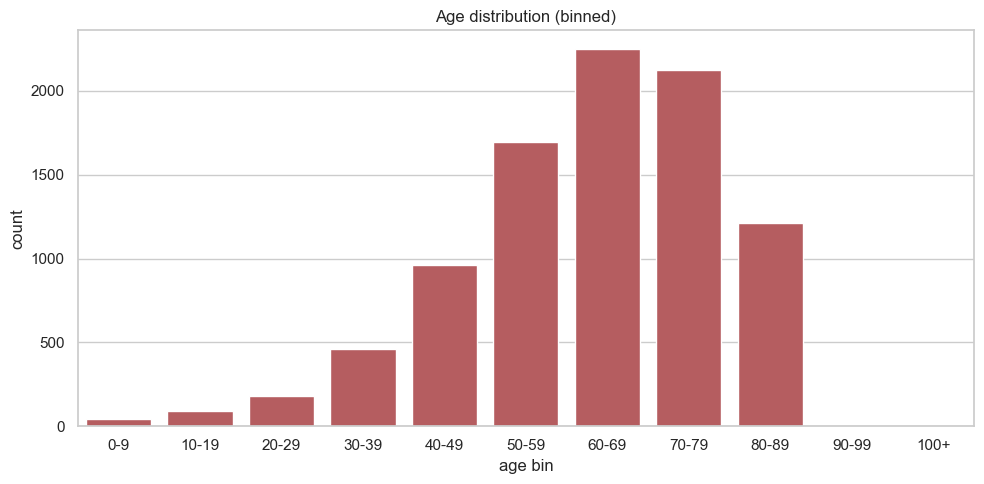

In [43]:
if 'sex' in isic_diagnosis_3_filtered.columns:
    sex_counts = isic_diagnosis_3_filtered['sex'].value_counts(dropna=False)
    plt.figure(figsize=(8, max(3, 0.35 * len(sex_counts))))
    sns.barplot(x=sex_counts.values, y=sex_counts.index.astype(str), orient='h', color='#4C72B0')
    plt.title(f"Sex distribution")
    plt.xlabel('count')
    plt.ylabel('sex')
    plt.tight_layout()
    plt.show()

if 'diagnosis_1' in isic_diagnosis_3_filtered.columns:
    diag1_counts = isic_diagnosis_3_filtered['diagnosis_1'].value_counts(dropna=False)
    plt.figure(figsize=(10, max(4, 0.4 * len(diag1_counts))))
    sns.barplot(x=diag1_counts.values, y=diag1_counts.index.astype(str), orient='h', color='#55A868')
    plt.title(f"diagnosis_1")
    plt.xlabel('count')
    plt.ylabel('diagnosis_1')
    plt.tight_layout()
    plt.show()

if 'age_approx' in isic_diagnosis_3_filtered.columns:
    ages = pd.to_numeric(isic_diagnosis_3_filtered['age_approx'], errors='coerce')
    bins = list(range(0, 101, 10)) + [float('inf')]
    labels = [f"{i}-{i+9}" for i in range(0, 100, 10)] + ["100+"]
    age_bins = pd.cut(ages, bins=bins, labels=labels, right=False)
    age_counts = age_bins.value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=age_counts.index.astype(str), y=age_counts.values, color='#C44E52')
    plt.title(f"Age distribution (binned)")
    plt.xlabel('age bin')
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()



In [58]:
null_counts = isic_diagnosis_3.isnull().sum()
null_pct = (isic_diagnosis_3.isnull().mean() * 100).round(2)
null_stats = (
    pd.DataFrame({
        'null_count': null_counts,
        'null_pct': null_pct,
    })
    .sort_values('null_count', ascending=True)
)
print("\nNaN stats per column:")
display(null_stats)


NaN stats per column:


,null_count,null_pct
isic_id,0,0.00
pixels_x,0,0.00
pixels_y,0,0.00
diagnosis_3,0,0.00
diagnosis_2,0,0.00
diagnosis_1,0,0.00
image_type,1,0.00
age_approx,13937,15.57
melanocytic,13969,15.61
sex,14661,16.38


In [ ]:
# Single DataFrame with all selected image_type values
valid_types = [
    "clinical: close-up",
    "TBP tile: close-up",
    "clinical: overview",
]
image_type_series = isic_metadata['image_type'].astype(str).str.strip()

isic_subset_all = isic_metadata.loc[image_type_series.isin(valid_types)].copy()
print(f"Rows in combined subset: {len(isic_subset_all):,}")
print("\nimage_type counts:")
print(isic_subset_all['image_type'].value_counts())
